In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np


In [2]:
df=pd.read_csv('./data/data.csv', error_bad_lines=False)
df

/home/arghanath/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1


In [3]:
# df=pd.read_csv('./data/data.csv', sep='\t', index_col=False)
# df

In [4]:
df.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [5]:
df.shape

(669640, 2)

In [6]:
df['password'].unique()

array(['kzde5577', 'kino3434', 'visi7k1yr', ..., '184520socram',
       'marken22a', 'fxx4pw4g'], dtype=object)

In [7]:
df['strength'].unique()

array([1, 2, 0])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


In [9]:
df.isnull().sum()

password    1
strength    0
dtype: int64

In [10]:
df[df['password'].isnull()]

,password,strength
367579,NaN,0


In [11]:
df.dropna(inplace=True)

/home/arghanath/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='strength', ylabel='count'>

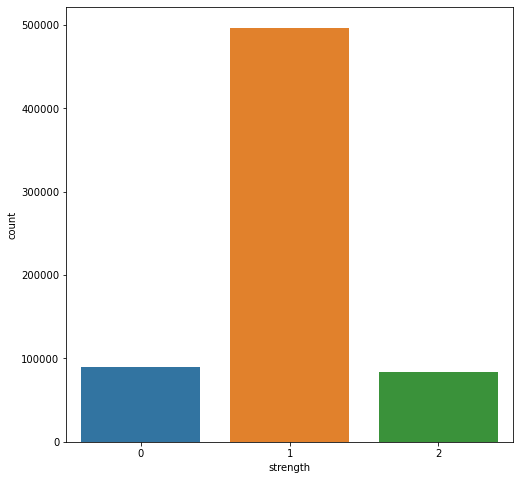

In [12]:
plt.figure(figsize=(8,8))
sn.countplot(df.strength)

In [13]:
passwords=np.array(df)
passwords

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer # Helps to find out the unique words from a text document.

In [15]:
X=[password[0] for password in passwords]
y=[password[1] for password in passwords]

In [16]:
len(X)

669639

In [17]:
len(y)

669639

In [18]:
def conv_chars(word):
    characters=[]
    for character in word:
        characters.append(character)
    return characters

In [19]:
vectorizer=TfidfVectorizer(tokenizer=conv_chars)

In [20]:
newX=vectorizer.fit_transform(X)

In [21]:
newX.shape

(669639, 153)

In [22]:
X_train, X_test, y_train, y_test=train_test_split(newX,y, test_size=0.3)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model=LogisticRegression() #newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}

In [25]:
log=model.fit(X_train,y_train)

/home/arghanath/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
score=model.score(X_test,y_test)
score

0.8181410907353205

In [27]:
model=LogisticRegression(solver='newton-cg')
log=model.fit(X_train,y_train)
score=model.score(X_test,y_test)
score

0.8184397586763037

In [28]:
# model=LogisticRegression(solver='liblinear')
# log=model.fit(X_train,y_train)
# score=model.score(X_test,y_test)
# score

In [29]:
# model=LogisticRegression(solver='lbfgs')
# log=model.fit(X_train,y_train)
# score=model.score(X_test,y_test)
# score

In [30]:
# model=LogisticRegression(solver='sag')
# log=model.fit(X_train,y_train)
# score=model.score(X_test,y_test)
# score

In [31]:
# model=LogisticRegression(solver='saga')
# log=model.fit(X_train,y_train)
# score=model.score(X_test,y_test)
# score

In [32]:
# I will be using solver='newton-cg' as it got the best score among the other solvers.
model=LogisticRegression(solver='newton-cg', max_iter=669639)
log=model.fit(X_train,y_train)
score=model.score(X_test,y_test)
score

0.8184397586763037

In [33]:
# pip install xgboost to download the library into your library.
from xgboost import XGBClassifier 
from sklearn.metrics import mean_absolute_error
xgb=XGBClassifier(tree_method='hist', eval_metrics=mean_absolute_error)
xgb.fit(X_train,y_train, eval_set=[(X_train,y_train)])

/home/arghanath/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:31:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:0.84689
[1]	validation_0-mlogloss:0.69454
[2]	validation_0-mlogloss:0.59172
[3]	validation_0-mlogloss:0.51746
[4]	validation_0-mlogloss:0.45982
[5]	validation_0-mlogloss:0.41511
[6]	validation_0-mlogloss:0.37845
[7]	validation_0-mlogloss:0.34850
[8]	validation_0-mlogloss:0.32367
[9]	validation_0-mlogloss:0.30277
[10]	validation_0-mlogloss:0.28373
[11]	validation_0-mlogloss:0.26895
[12]	validation_0-mlogloss:0.25508
[13]	validation_0-mlogloss:0.24329
[14]	validation_0-mlogloss:0.23316
[15]	validation_0-mlogloss:0.22376
[16]	validation_0-mlogloss:0.21518
[17]	validation_0-mlogloss:0.20787
[18]	validation_0-mlogloss:0.20078
[19]	validation_0-mlogloss:0.19427
[20]	validation_0-mlogloss:0.18846
[21]	validation_0-mlog

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metrics=<function mean_absolute_error at 0x7f00cb552f70>,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='hist', validate_parameters=1,
              verbosity=None)

In [34]:
xgb.score(X_test,y_test)


0.9800937817334687

In [35]:
import pickle

In [36]:
with open('xgbclassifier.pkl', 'wb+') as f:
    pickle.dump(xgb,f) 
    f.close()

In [37]:
with open('vectorizer.pkl', 'wb+') as f:
    pickle.dump(vectorizer,f)
    f.close()